In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 파일 불러오기
test_data = pd.read_csv('./data/FIFA_test.csv')
train_data = pd.read_csv('./data/FIFA_train.csv')

### FIFA_train.csv


|변수명|변수 설명|변수 타입|타입 설명|
|:---:|:---:|:---:|:---:|
|**id**|선수의 고유의 아이디| int||
|**name**             | 이름                                               | string|
|**age**              | 나이                                               | int|15세부터 40세
|**continent**        | 선수들의 국적이 포함되어 있는 대륙                 | string|5개 대륙
|**contract_until**   | 선수의 계약기간                                    | object||
|**position**         | 선수가 선호하는 포지션 ex) 공격수, 수비수 등       | object|4개의 범주 구성(GK,DF,MF,ST)
|**prefer_foot**      | 선수가 선호하는 발 ex) 오른발                      | object|2개의 범주 구성(왼발,오른발)
|**reputation**       | 선수가 유명한 정도 ex) 높은 수치일 수록 유명한 선수|float|1.0부터 5.0까지 구성 - 5단계
|**stat_overall**     | 선수의 현재 능력치                                 | int||
|**stat_potential**   | 선수가 경험 및 노력을 통해 발전할 수 있는 정도     | int||
|**stat_skill_moves** | 선수의 개인기 능력치                               |float|1.0부터 5.0까지 구성 - 5단계
|**value**            | FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)  |float||

In [3]:
train_data.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
test_data.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [5]:
train_data['continent'].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

능력치가 같더라도 포지션,나이에 따라서 value의 가치가 다른지 확인하기

인기에따라 value가 다른지 확인하기

각 변수별 가중치,중요도 여부

value 간략하게 할 방법 찾기


In [6]:
# 중복되는 변수 확인
pd.DataFrame(train_data.isnull().sum())

,0
id,0
name,0
age,0
continent,0
contract_until,0
position,0
prefer_foot,0
reputation,0
stat_overall,0
stat_potential,0


In [7]:
# 변수별 정보 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
id                  8932 non-null int64
name                8932 non-null object
age                 8932 non-null int64
continent           8932 non-null object
contract_until      8932 non-null object
position            8932 non-null object
prefer_foot         8932 non-null object
reputation          8932 non-null float64
stat_overall        8932 non-null int64
stat_potential      8932 non-null int64
stat_skill_moves    8932 non-null float64
value               8932 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [8]:
# 중복된 데이터 확인

train_data.duplicated().sum()

0

In [9]:
def reputation(x) : 
    if x == 1 : 
        return '*'
    elif x == 2 : 
        return '**'
    elif x == 3 : 
        return '***'
    elif x == 4 :
        return '****'
    else : 
        return '*****'

In [10]:
train_data['cat_reputation']= train_data['reputation'].apply(lambda x : int(x)).apply(lambda x : reputation(x))
train_data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,cat_reputation
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,*****
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,****
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,*****
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,****
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,***
5,12,D. Godín,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0,***
6,13,David Silva,32,europe,2020,MF,left,4.0,90,90,4.0,60000000.0,****
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0,***
8,18,M. ter Stegen,26,europe,2022,GK,right,3.0,89,92,1.0,58000000.0,***
9,19,T. Courtois,26,europe,2024,GK,left,4.0,89,90,1.0,53500000.0,****


In [11]:
# reputation을 범주형으로
train_data['cat_reputation']= train_data['reputation'].astype('category')
train_data['cat_reputation'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

In [12]:
# 고유 번호 삭제
train_data = train_data[train_data.columns[1:]]

In [13]:
# 이름을 인덱스로 지정
train_data.rename(index = train_data['name'],inplace = True)
del train_data['name']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
train_data.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,cat_reputation
L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,5.0
De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,4.0
L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,5.0
Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,4.0
J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,3.0


In [15]:
train_data.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


### Corr

In [16]:
# 상관계수 확인
train_corr = train_data.corr()

train_corr.round(2)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.00,0.26,0.47,-0.23,0.04,0.09
reputation,0.26,1.00,0.52,0.40,0.20,0.67
stat_overall,0.47,0.52,1.00,0.67,0.40,0.66
stat_potential,-0.23,0.40,0.67,1.00,0.33,0.61
stat_skill_moves,0.04,0.20,0.40,0.33,1.00,0.30
value,0.09,0.67,0.66,0.61,0.30,1.00


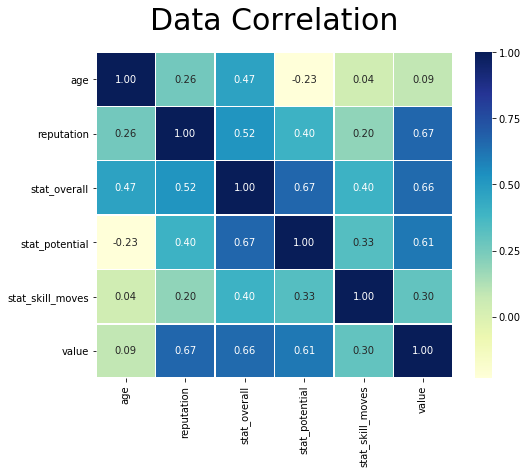

In [17]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8,6))
plt.title("Data Correlation", fontsize=30, position=(0.5, 1.0+0.05))
sns.heatmap(train_corr, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='YlGnBu')
plt.show()

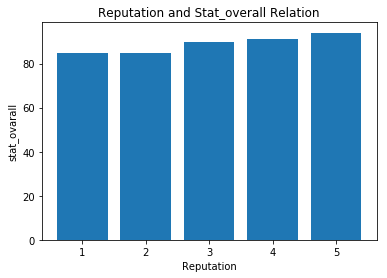

In [18]:
# 인기도별 stat 수치
plt.bar('cat_reputation','stat_overall',data = train_data)
plt.title('Reputation and Stat_overall Relation')
plt.xlabel('Reputation')
plt.ylabel('stat_ovarall')

plt.show()

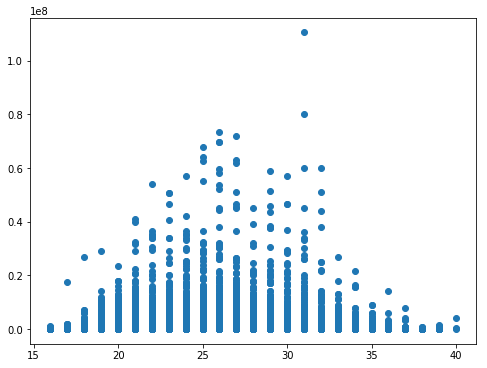

In [19]:
plt.figure(figsize = (8,6))

plt.scatter('age','value',data = train_data)

plt.show()

### pivot table

In [20]:
# 나이 15-19,20-24,25-29,30-34,35-39,40으로 분리
# include_lowest는 객체의 가장 작은 값을 포함 여부를 지정하는 것으로 기본값은 False로서 포함하지않음. 
# right = False이면 위 함수의 결과중의 한 구간을 (a, b]로 표시함.
# false(default)일 경우 a<x<b라는 의미 , True일 경우 [a, b] 즉,  a<x<=b

group_names = ['15-19', '20-24','25-29','30-34','35-39','40']

cut_age =  pd.cut(train_data['age'],[14,19,24,29,34,39,41], right= True, labels = group_names)

cut_age

L. Messi              30-34
De Gea                25-29
L. Suárez             30-34
Sergio Ramos          30-34
J. Oblak              25-29
D. Godín              30-34
David Silva           30-34
N. Kanté              25-29
M. ter Stegen         25-29
T. Courtois           25-29
Sergio Busquets       25-29
E. Cavani             30-34
M. Neuer              30-34
G. Chiellini          30-34
M. Salah              25-29
Casemiro              25-29
L. Insigne            25-29
Isco                  25-29
Coutinho              25-29
P. Aubameyang         25-29
M. Hummels            25-29
H. Lloris             30-34
G. Higuaín            30-34
G. Buffon                40
S. Umtiti             20-24
K. Koulibaly          25-29
P. Pogba              25-29
R. Lukaku             25-29
Jordi Alba            25-29
D. Mertens            30-34
                      ...  
M. Schantl            15-19
P. Paya               15-19
E. Bilen              15-19
S. Dawood             15-19
J. Granlund         

In [21]:
pd.value_counts(cut_age)

20-24    3244
25-29    2947
30-34    1526
15-19     984
35-39     228
40          3
Name: age, dtype: int64

In [22]:
# train_data에 적용
train_data['cut_age'] = cut_age
train_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,cat_reputation,cut_age
L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,5.0,30-34
De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,4.0,25-29
L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,5.0,30-34
Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,4.0,30-34
J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,3.0,25-29


In [23]:
# 40세인 선수만
train_data[train_data['age'] == 40]

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,cat_reputation,cut_age
G. Buffon,40,europe,2019,GK,right,4.0,88,88,1.0,4000000.0,4.0,40
S. Bertoli,40,south america,2019,GK,right,1.0,73,73,1.0,270000.0,1.0,40
B. Castillo,40,south america,2021,GK,right,1.0,66,66,1.0,40000.0,1.0,40


In [24]:
# 나이 간략하게 범주화 시킬것

pos_pivot = train_data.pivot_table(values = 'value' , index = 'position', columns = 'cut_age', aggfunc = np.mean, fill_value = 0)

pos_pivot.round(2)

cut_age,15-19,20-24,25-29,30-34,35-39,40
position,,,,,,
DF,702062.50,2170379.81,2877910.37,2352071.82,782685.19,0.00
GK,632790.70,956472.30,4008547.79,2611527.78,414814.81,1436666.67
MF,728157.22,2996117.10,4105202.46,3347390.51,552327.59,0.00
ST,808083.70,2824937.69,4402847.99,4740039.22,1958714.29,0.00


In [25]:
# 스텟 간략하게 범주화
group_name = ['46-49','50-59','60-69','70-79','80-89','90-94']

cut_overall =  pd.cut(train_data['stat_overall'],[46,49,59,69,79,89,94], right= True, labels = group_name)

cut_overall

L. Messi              90-94
De Gea                90-94
L. Suárez             90-94
Sergio Ramos          90-94
J. Oblak              90-94
D. Godín              90-94
David Silva           90-94
N. Kanté              80-89
M. ter Stegen         80-89
T. Courtois           80-89
Sergio Busquets       80-89
E. Cavani             80-89
M. Neuer              80-89
G. Chiellini          80-89
M. Salah              80-89
Casemiro              80-89
L. Insigne            80-89
Isco                  80-89
Coutinho              80-89
P. Aubameyang         80-89
M. Hummels            80-89
H. Lloris             80-89
G. Higuaín            80-89
G. Buffon             80-89
S. Umtiti             80-89
K. Koulibaly          80-89
P. Pogba              80-89
R. Lukaku             80-89
Jordi Alba            80-89
D. Mertens            80-89
                      ...  
M. Schantl            50-59
P. Paya               50-59
E. Bilen              50-59
S. Dawood             50-59
J. Granlund         

In [26]:
pd.value_counts(cut_overall)

60-69    4619
70-79    2837
50-59    1126
80-89     326
46-49      17
90-94       7
Name: stat_overall, dtype: int64

In [27]:
# 스텟 간략하게 범주화 시킬것

train_data['cut_overall'] = cut_overall

In [28]:
pos_pivot = train_data.pivot_table(values = 'value' , index = 'cut_overall', columns = 'position', aggfunc = np.mean, fill_value = 0)

pos_pivot.round(2)

position,DF,GK,MF,ST
cut_overall,,,,
46-49,47500.00,51666.67,53333.33,60000.00
50-59,146518.52,113916.67,164324.32,178397.13
60-69,600517.02,473855.04,719806.58,780232.16
70-79,4141144.91,3353107.00,5128044.43,5375415.13
80-89,19704819.28,19512195.12,25675373.13,27176470.59
90-94,47500000.00,70000000.00,60000000.00,95250000.00


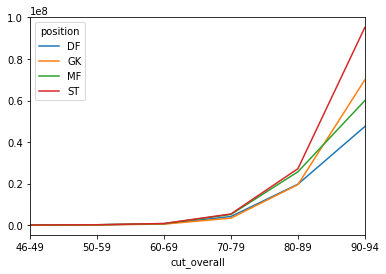

In [29]:
pos_pivot.plot()
plt.show()

70대 능력치까진 value는 비슷했으나 70중반부터는 포지션별 차이가 커짐을 알 수 있었다.

대체적으로 value의 값은 ST > MF > DF > GK순이였으나, GK의 능력치가 85~94 부분에서 DF와 MF보다 높음을 알 수 있었다.

In [30]:
# 능력치 80이 넘는 선수중 GK만
# isin를 통해 position에서 gk를 가지고 있는 행만 출력하도록 함.
# 총 35명의 선수들로 구성

stat_gk = train_data[train_data['stat_overall']> 80]
stat_gk[stat_gk['position'].isin(['GK'])].describe().round(2)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,35.00,35.00,35.00,35.00,35.0,35.00
mean,28.83,2.66,84.11,85.86,1.0,24685714.29
std,3.96,0.94,2.75,3.44,0.0,16412909.96
min,19.00,1.00,81.00,82.00,1.0,3000000.00
25%,26.00,2.00,82.00,83.00,1.0,14500000.00
50%,28.00,3.00,83.00,84.00,1.0,20000000.00
75%,31.00,3.00,84.50,88.00,1.0,29250000.00
max,40.00,5.00,91.00,93.00,1.0,72000000.00


In [31]:
# 능력치 80이 넘는 선수중 DF만
stat_df = train_data[train_data['stat_overall']> 80]
stat_df[stat_df['position'].isin(['DF'])].describe().round(2)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,58.00,58.00,58.00,58.00,58.00,58.00
mean,28.02,2.69,83.47,85.22,2.41,24418965.52
std,3.92,0.73,2.47,3.11,0.62,11892581.45
min,18.00,1.00,81.00,81.00,2.00,4800000.00
25%,25.00,2.00,82.00,83.00,2.00,17500000.00
50%,29.00,3.00,83.00,85.00,2.00,21000000.00
75%,31.00,3.00,85.00,87.75,3.00,31125000.00
max,35.00,4.00,91.00,92.00,4.00,57000000.00


In [32]:
# 능력치 80이 넘는 선수중 MF만
stat_mf = train_data[train_data['stat_overall']> 80]
stat_mf[stat_mf['position'].isin(['MF'])].describe().round(2)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,103.00,103.00,103.00,103.00,103.00,103.00
mean,27.40,2.61,83.27,84.86,3.59,29291262.14
std,3.23,0.76,2.11,2.80,0.81,13339188.23
min,21.00,1.00,81.00,81.00,2.00,8000000.00
25%,25.00,2.00,82.00,83.00,3.00,19750000.00
50%,27.00,3.00,83.00,84.00,4.00,26000000.00
75%,30.00,3.00,84.00,87.00,4.00,34500000.00
max,34.00,4.00,90.00,91.00,5.00,69500000.00


In [33]:
train_data['contract_until'] = train_data['contract_until'].apply(lambda x : str(x)).apply(lambda x : x[-4:])
train_data

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,cat_reputation,cut_age,cut_overall
L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,5.0,30-34,90-94
De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,4.0,25-29,90-94
L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,5.0,30-34,90-94
Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,4.0,30-34,90-94
J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,3.0,25-29,90-94
D. Godín,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0,3.0,30-34,90-94
David Silva,32,europe,2020,MF,left,4.0,90,90,4.0,60000000.0,4.0,30-34,90-94
N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0,3.0,25-29,80-89
M. ter Stegen,26,europe,2022,GK,right,3.0,89,92,1.0,58000000.0,3.0,25-29,80-89
T. Courtois,26,europe,2024,GK,left,4.0,89,90,1.0,53500000.0,4.0,25-29,80-89


In [34]:
train_data.contract_until.value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [35]:
# 재계약 기간에 따른 정리
contract_df = train_data.groupby('contract_until').sum()
contract_df

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
contract_until,,,,,,
2018,10398,407.0,25529,26955,890.0,5.029850e+08
2019,75050,3238.0,192563,205488,6858.0,5.062010e+09
2020,51881,2316.0,137647,147093,4907.0,4.916320e+09
2021,56415,2578.0,153021,166253,5471.0,6.525970e+09
2022,18458,947.0,53893,58032,1982.0,4.489195e+09
2023,12617,589.0,35343,37883,1295.0,2.935870e+09
2024,267,19.0,964,1033,35.0,2.941000e+08
2025,59,4.0,213,252,11.0,4.216000e+07
2026,23,3.0,85,90,3.0,5.050000e+07


In [36]:
# 남은 계약기간 총합
con_value = train_data['contract_until'].value_counts()
con_value

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

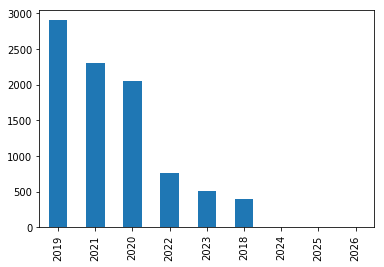

In [37]:
# 이거 간략하게 할 것

con_value.plot(kind = 'bar')
plt.show()

In [38]:
train_data['prefer_foot'].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

변수별 중요도 측정 - 의사결정나무

일정 나이가 지난 선수는 stat_overall을,

어린 유망주들은 stat_potential을 치중해서 비교해보기